# Reservoir Normal Form Game Instance (aka single-shot) - Farah Rawas

Step 0- Import necessary Packages
Note: Some packages might not load due to firewall etc...

In [8]:
using Pkg
Pkg.add("https://github.com/QuantEcon/Games.jl.git")#

In [9]:
using Games

Step 1- Define and set the values for the different variables and define the payoff function

In this game the payoffs look like the following:

$$payoff(A)= \begin{cases}(Sales*(MarketPrice), &\mbox{if } \mbox{D_A+D_B==demand}\\(Market_Price)*(D_A-demand), &\mbox{if } \mbox{D_A+ D_B<demand}\\Sales*(MarketPrice)-(D_A-demand)*penalty, &\mbox{if } \mbox{D_A+D_B>demand} \end{cases}$$



In [1]:

#demand
d= 1000
ρ = 0.3 # ()$/cms)
σ = 0.5 #spot market price
n= 2 #number of players
N = ["A", "B"]
Opt_A = 780 #aribtrary, should a be an array of optimal releases for each storage state for each scenario
Opt_B = 880
D_A = [0:10:Opt_A;]
D_B = [0:10:Opt_B;]
#S_A = [d-D_A]
#S_B = [d- D_B]

#payoffs

function calculate_payoff(x,y,z)
    if x + y == d
        return σ*x
    elseif x+y < d
        return σ*(z-x-d)
    elseif x+y > d
        return σ*x - ρ*(z-x-d)
    end
end

calculate_payoff (generic function with 1 method)

Step 2- Build the payoff matrix for each player

In [2]:
Payoff_A = [ calculate_payoff(D_A[i], D_B[j], Opt_A) for i in 1:length(D_A), j in 1:length(D_B) ]

79×89 Array{Float64,2}:
 -110.0  -110.0  -110.0  -110.0  -110.0  …  -110.0  -110.0  -110.0  -110.0
 -115.0  -115.0  -115.0  -115.0  -115.0     -115.0  -115.0  -115.0  -115.0
 -120.0  -120.0  -120.0  -120.0  -120.0     -120.0  -120.0  -120.0  -120.0
 -125.0  -125.0  -125.0  -125.0  -125.0     -125.0  -125.0  -125.0  -125.0
 -130.0  -130.0  -130.0  -130.0  -130.0     -130.0  -130.0  -130.0  -130.0
 -135.0  -135.0  -135.0  -135.0  -135.0  …  -135.0  -135.0  -135.0  -135.0
 -140.0  -140.0  -140.0  -140.0  -140.0     -140.0  -140.0  -140.0  -140.0
 -145.0  -145.0  -145.0  -145.0  -145.0     -145.0  -145.0  -145.0  -145.0
 -150.0  -150.0  -150.0  -150.0  -150.0     -150.0  -150.0  -150.0  -150.0
 -155.0  -155.0  -155.0  -155.0  -155.0     -155.0  -155.0  -155.0  -155.0
 -160.0  -160.0  -160.0  -160.0  -160.0  …  -160.0  -160.0  -160.0  -160.0
 -165.0  -165.0  -165.0  -165.0  -165.0     -165.0  -165.0  -165.0  -165.0
 -170.0  -170.0  -170.0  -170.0  -170.0     -170.0  -170.0  -170.0    60.0
 

In [10]:
Payoff_B = [ calculate_payoff(D_B[i], D_A[j], Opt_B) for i in 1:length(D_B), j in 1:length(D_A) ]
Player_A, Player_B = Player(Payoff_A), Player(Payoff_B)
Res_game= NormalFormGame(Player_A, Player_B)

89×79 Array{Float64,2}:
  -60.0   -60.0   -60.0   -60.0   -60.0  …   -60.0   -60.0   -60.0   -60.0
  -65.0   -65.0   -65.0   -65.0   -65.0      -65.0   -65.0   -65.0   -65.0
  -70.0   -70.0   -70.0   -70.0   -70.0      -70.0   -70.0   -70.0   -70.0
  -75.0   -75.0   -75.0   -75.0   -75.0      -75.0   -75.0   -75.0   -75.0
  -80.0   -80.0   -80.0   -80.0   -80.0      -80.0   -80.0   -80.0   -80.0
  -85.0   -85.0   -85.0   -85.0   -85.0  …   -85.0   -85.0   -85.0   -85.0
  -90.0   -90.0   -90.0   -90.0   -90.0      -90.0   -90.0   -90.0   -90.0
  -95.0   -95.0   -95.0   -95.0   -95.0      -95.0   -95.0   -95.0   -95.0
 -100.0  -100.0  -100.0  -100.0  -100.0     -100.0  -100.0  -100.0  -100.0
 -105.0  -105.0  -105.0  -105.0  -105.0     -105.0  -105.0  -105.0  -105.0
 -110.0  -110.0  -110.0  -110.0  -110.0  …  -110.0  -110.0  -110.0  -110.0
 -115.0  -115.0  -115.0  -115.0  -115.0     -115.0  -115.0  -115.0  -115.0
 -120.0  -120.0  -120.0  -120.0  -120.0     -120.0  -120.0  -120.0  -120.0
 

Define the Normal Form Game through your player's payoff functions
Important: pure_nash function give you a tuple of the equilibrium points locations (i.e. use to find out the actions and payoff they refer to)

In [11]:
#Game payoff pairs just for the sake of it
SuperMatrix=[(Payoff_A[i,j],Payoff_B[j,i]) for i in 1:length(D_A), j in 1:length(D_B)]

79×89 Array{Tuple{Float64,Float64},2}:
 (-110.0, -60.0)  (-110.0, -65.0)  …  (-110.0, -495.0)  (-110.0, -500.0)
 (-115.0, -60.0)  (-115.0, -65.0)     (-115.0, -495.0)  (-115.0, -500.0)
 (-120.0, -60.0)  (-120.0, -65.0)     (-120.0, -495.0)  (-120.0, -500.0)
 (-125.0, -60.0)  (-125.0, -65.0)     (-125.0, -495.0)  (-125.0, -500.0)
 (-130.0, -60.0)  (-130.0, -65.0)     (-130.0, -495.0)  (-130.0, -500.0)
 (-135.0, -60.0)  (-135.0, -65.0)  …  (-135.0, -495.0)  (-135.0, -500.0)
 (-140.0, -60.0)  (-140.0, -65.0)     (-140.0, -495.0)  (-140.0, -500.0)
 (-145.0, -60.0)  (-145.0, -65.0)     (-145.0, -495.0)  (-145.0, -500.0)
 (-150.0, -60.0)  (-150.0, -65.0)     (-150.0, -495.0)  (-150.0, -500.0)
 (-155.0, -60.0)  (-155.0, -65.0)     (-155.0, -495.0)  (-155.0, -500.0)
 (-160.0, -60.0)  (-160.0, -65.0)  …  (-160.0, -495.0)  (-160.0, -500.0)
 (-165.0, -60.0)  (-165.0, -65.0)     (-165.0, -495.0)  (-165.0, -500.0)
 (-170.0, -60.0)  (-170.0, -65.0)     (-170.0, -495.0)  (60.0, 440.0)   
 ⋮          

How does the game action-pair payoff matrix look like?

In [5]:
#Finding a set of Nash Equilibrium values
nash_array=pure_nash(Res_game; ntofind=20, tol=1e-

2-element Array{Tuple{Int64,Int64},1}:
 (1, 1)  
 (79, 89)

In [15]:
#pick a random pure nash
rand(nash_array)
#the payoff of this
SuperMatrix[79,89] #automate

(690.0, 740.0)

In [16]:
#what action this refers to?
#Simply, it's the 79th for A
D_A[79]

780

Another way of generating policies is looking at the best response for 1 player while fixing the other player's action
Below, we plot the best response for player A as a function of the actions of player B.

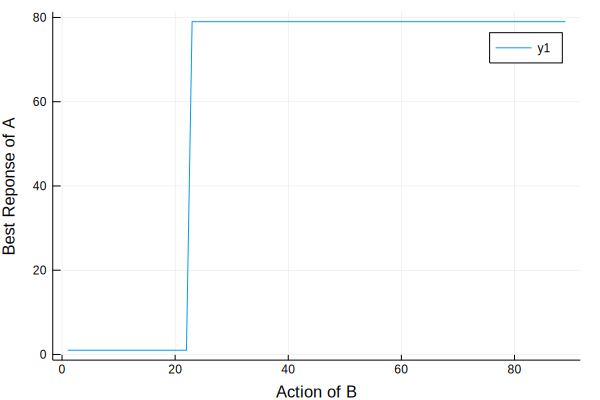

In [17]:
BR_A=[best_response(Res_game.players[1],i) for i in 1:length(D_B)]
using Plots
plot(BR_A, ylabel="Best Reponse of A", xlabel="Action of B")